In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from shapely.geometry import Polygon as GPoly
from shapely.geometry import Point
import pandas as pd

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Research/Forest_Fire/gangwon_fire_predict/re_data/강원특별자치도 산불 현황 데이터_2020.csv')

In [4]:
# csv 데이터에서 위 경도 값 때오기.

latitudes = data['LOC_INFO_Y'].values
longitudes = data['LOC_INFO_X'].values

In [5]:
# 중심 좌표값 설정. 별 찍을 려고.

center_lat = 37.5
center_lon = 127.0

In [6]:
# 별 그리기. intel 방식과 동일.

pi = np.pi
x = []
y = []
for k in range(0, 5):
    r = 4/9
    x.append(r * np.cos(2 * pi * k / 5 - 2 * pi / 10) + center_lon)
    y.append(r * np.sin(2 * pi * k / 5 - 2 * pi / 10) + center_lat)
    r = 1
    x.append(r * np.cos(2 * pi * k / 5) + center_lon)
    y.append(r * np.sin(2 * pi * k / 5) + center_lat)


# 별 좌표 np 베열로.
polyStar = np.array(list(zip(x, y)))
polyStarP = Polygon(polyStar, closed=True, fc=(1, 0, 0, 0.3), ec=(0, 0, 1, 0.3))
polyStarG = GPoly(polyStar)

In [7]:
N_rnd = 1000 #점 1000개 생성.

xrnd = 4 * np.random.sample(N_rnd) + center_lon - 2 # 125 ~ 129값 사이의 난수 값. 나중에 별 폴리건 안에 있는지 없는지 판별하려고.
yrnd = 2 * np.random.sample(N_rnd) + center_lat - 1 # 36.5~ 38.5 난수 값.
prnd = np.array(list(zip(xrnd, yrnd)))

In [8]:
# 별 폴리건 안에 있는지 없는지. 그거로 fire, nofire 구분.

fire_points = []
no_fire_points = []

for point in prnd:
    if polyStarG.contains(Point(point)):
        fire_points.append(point)
    else:
        no_fire_points.append(point)


fire_points = np.array(fire_points)
no_fire_points = np.array(no_fire_points)



# 위에 뽑아낸거 csv 파일로.
np.savetxt('SyntheticVerticesTrainFire.csv', fire_points[:100], delimiter=',', header='Longitude,Latitude', comments='')
np.savetxt('SyntheticVerticesValFire.csv', fire_points[100:125], delimiter=',', header='Longitude,Latitude', comments='')
np.savetxt('SyntheticVerticesTrainNoFire.csv', no_fire_points[:100], delimiter=',', header='Longitude,Latitude', comments='')
np.savetxt('SyntheticVerticesValNoFire.csv', no_fire_points[100:125], delimiter=',', header='Longitude,Latitude', comments='')

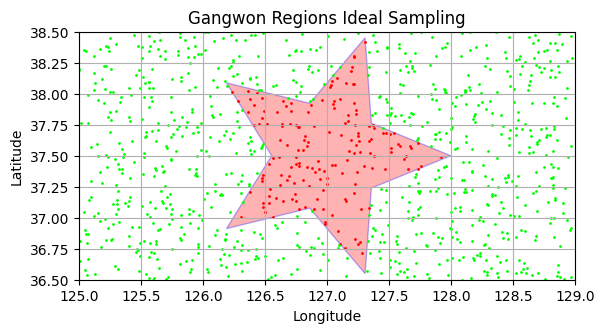

In [9]:
fig, ax = plt.subplots()
ax.add_patch(polyStarP)

plt.scatter(fire_points[:, 0], fire_points[:, 1], s=1, c='r')
plt.scatter(no_fire_points[:, 0], no_fire_points[:, 1], s=1, c='lime')


plt.gca().set_aspect('equal')
plt.xlim(center_lon - 2, center_lon + 2)
plt.ylim(center_lat - 1, center_lat + 1)
plt.grid()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Gangwon Regions Ideal Sampling')

plt.show()